In [1]:
import pandas as pd

In [2]:
# neste caso a "fonte" representa uma origem externa, mas poderia 
# ser o endereço de um arquivo na máquina. Caso seja utilizado
# Windows (localmente), deve-se utilizar a barra invertida, por 
# exemplo C:/arquivo.csv ou invés de utilizar C:\arquivo.csv
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# a função read_csv tem vários parâmetros, dentre eles alguns
# que podem ser utilizados com uma frequência maior podem ser:
# sep = determina o delimitador dos dados em uma linha (colunas), normalmente é
#   utilizada a vírgula, porém também podem ser utilizados outros caracteres
# enconding = determina a codificação utilizada no arquivo, isso normalmente
#   é uma das causas de problemas na leitura dos arquivos. Uma lista com as 
#   codificações disponíveis pode ser vista em 
#   https://docs.python.org/3/library/codecs.html#standard-encodings
#
# o retorno da função é um DataFrame
dados = pd.read_csv(fonte, sep=",", encoding="utf_8")

In [3]:
# retorna as n primeiras linhas do DataFrame, se nenhum valor for informado
# retornas as 5 primeiras linhas
dados.head(n=4)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B


In [4]:
# retorna o tamanhos dos dados em linhas, colunas
dados.shape

(127380, 136)

In [5]:
# retorna um array numpy multidimensional com as colunas do DataFrame
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
# retorna uma Series que representa a coluna informada entre colchetes 
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [7]:
# para selecionar mais de uma coluna, deve-se informar uma lista, o resultado
# será um outro DataFrame
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [8]:
# retorna os valores únicos
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [9]:
# retorna uma Series com a quantidade de valores, nesse caso estados
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [10]:
# retorna uma Series com a quantidade de idades ordenada, que no caso
# é o índice da Series
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

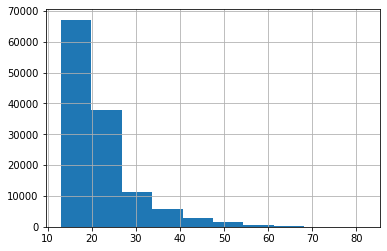

In [11]:
# gera um gráfico com o histograma referente as idades
dados["NU_IDADE"].hist()

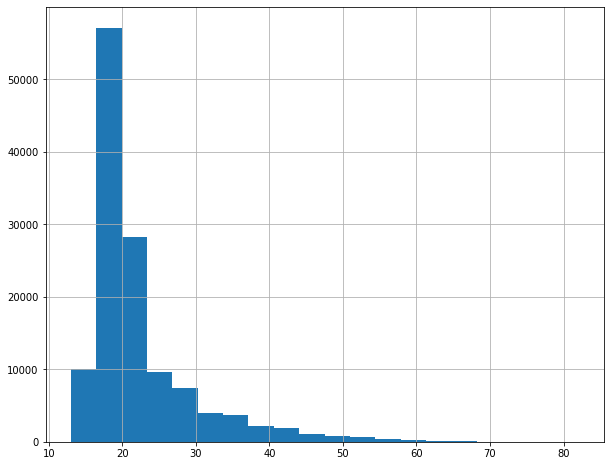

In [12]:
# gera um gráfico com o histograma referente as idades, usando um 
# intervalo (bins) e tamanho da figura do gráfico (figsize) diferentes
dados["NU_IDADE"].hist(bins=20, figsize=(10,8))

In [13]:
# realiza uma consulta nos dados, trazendo todos as linhas que são de 
# treineiros e contando a quantidade de idades, exibindo em ordem
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

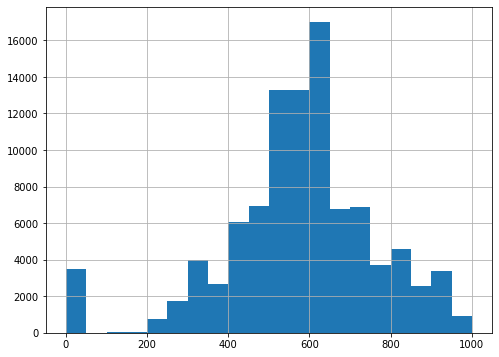

In [14]:
# gera um gráfico com o histograma referente as notas de redação
dados["NU_NOTA_REDACAO"].hist(bins=20, figsize=(8,6))

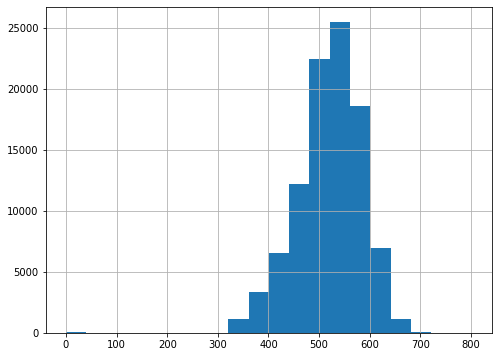

In [15]:
# gera um gráfico com o histograma referente as notas de linguagens e códigos
dados["NU_NOTA_LC"].hist(bins=20, figsize=(8,6))

In [16]:
# calcula a média da nota de redação
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [17]:
# calcula o desvio padrão da nota de redação
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [18]:
# lista com os nomes das colunas referentes as notas das provas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# retorna um DataFrame com descritores do DataFrame considerado
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [19]:
# retorna o quartil
dados["NU_NOTA_LC"].quantile(0.9)

596.3

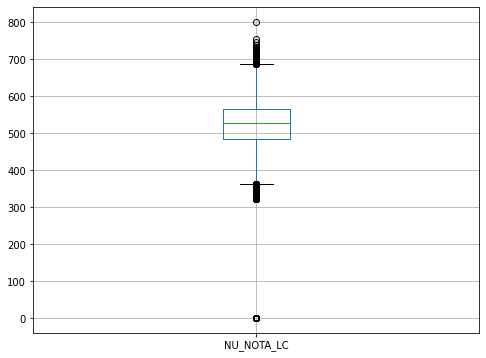

In [20]:
# gera um gráfico boxplot das notas de linguagens e códigos, onde a linha verde
# horizontal representa a mediana, o quadrado azul o intervalo onde a maioria
# das notas estão concentradas e as bolinhas pretas outras notas que não possuem 
# grande concentração. O parâmetro grid exibe as grades no gráfico e figsize o
# tamanho da figura do gráfico
dados["NU_NOTA_LC"].plot.box(grid=True, figsize=(8,6))

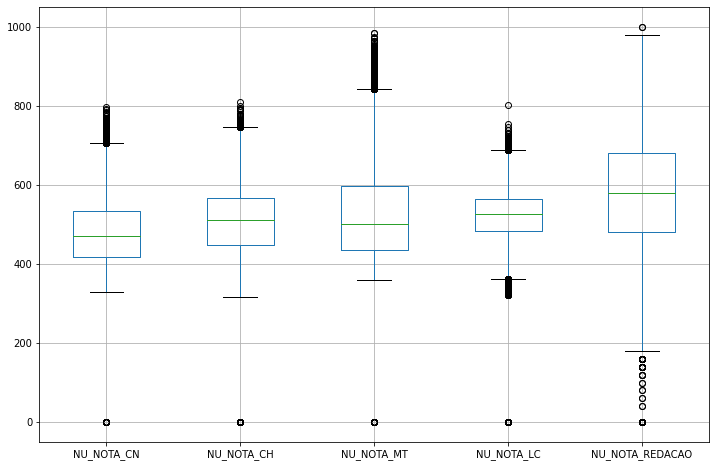

In [21]:
# gera um gráfico boxplot de todas notas
dados[provas].plot.box(grid=True, figsize=(12,8))

# Desafio 1
Proporção de inscritos por idade

In [22]:
# quantidade de idades disponíveis
quantidade_idades = dados["NU_IDADE"].count()
# realiza o cálculo percentual das idades
proporcao_idades = (dados["NU_IDADE"].value_counts() / quantidade_idades) * 100.0
# ordena a proporção pelo índice, que no caso é a idade. O parâmetro inplace
# faz com que a ordenação ocorra na própria variável, sem ser necessário a reatribuição
proporcao_idades.sort_index(inplace=True)

# percorre todas as linhas da Series e imprime o resultado
for idade, quantidade in proporcao_idades.iteritems():
  print(f"A idade {idade} tem o percentual {quantidade:.3f}%")

A idade 13 tem o percentual 0.003%
A idade 14 tem o percentual 0.111%
A idade 15 tem o percentual 1.577%
A idade 16 tem o percentual 6.147%
A idade 17 tem o percentual 16.687%
A idade 18 tem o percentual 16.841%
A idade 19 tem o percentual 11.319%
A idade 20 tem o percentual 8.175%
A idade 21 tem o percentual 5.705%
A idade 22 tem o percentual 4.651%
A idade 23 tem o percentual 3.665%
A idade 24 tem o percentual 3.013%
A idade 25 tem o percentual 2.456%
A idade 26 tem o percentual 2.133%
A idade 27 tem o percentual 1.738%
A idade 28 tem o percentual 1.544%
A idade 29 tem o percentual 1.272%
A idade 30 tem o percentual 1.251%
A idade 31 tem o percentual 1.146%
A idade 32 tem o percentual 1.026%
A idade 33 tem o percentual 0.913%
A idade 34 tem o percentual 0.808%
A idade 35 tem o percentual 0.733%
A idade 36 tem o percentual 0.701%
A idade 37 tem o percentual 0.699%
A idade 38 tem o percentual 0.620%
A idade 39 tem o percentual 0.549%
A idade 40 tem o percentual 0.504%
A idade 41 tem o 

# Desafio 2
Descobrir de quais estados são os inscritos com 13 anos

In [23]:
# opção 1
# recupera os estados que atendem a condição do desafio
estados_com_13_anos = dados[dados["NU_IDADE"]==13]["SG_UF_RESIDENCIA"].unique()
# ordena os estados
estados_com_13_anos.sort()
# imprime o resultados
print(estados_com_13_anos)

['AP' 'BA' 'MT' 'SP']


In [24]:
# opção 2
# recupera os estados que atendem a condição do desafio
estados_com_13_anos = dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].unique()
# ordena os estados
estados_com_13_anos.sort()
# imprime o resultados
print(estados_com_13_anos)

['AP' 'BA' 'MT' 'SP']


# Desafio 3
Colocar o título nos gráficos

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

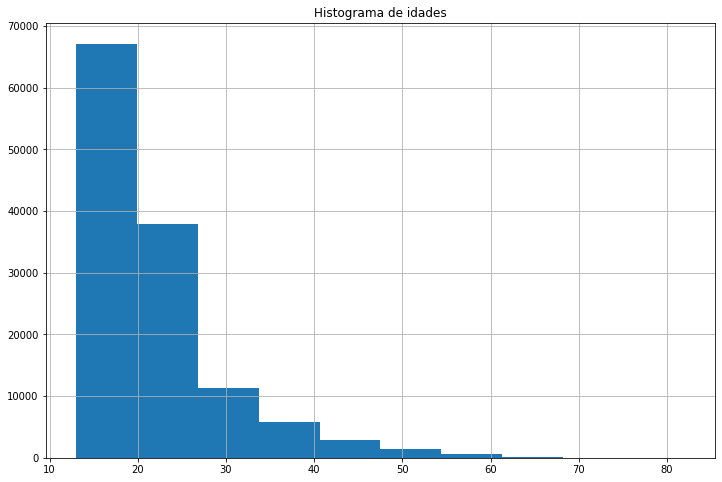

In [26]:
# gera um gráfico com o histograma referente as idades
grafico = dados["NU_IDADE"].hist(figsize=(12,8))
# define o título do gráfico
grafico.set_title("Histograma de idades")
# exibe o gráfico
plt.show()

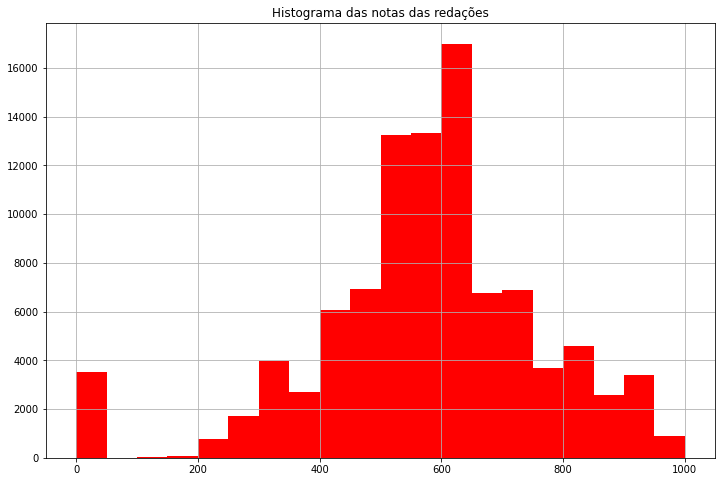

In [27]:
# gera um gráfico com o histograma referente as notas das redações
grafico = dados["NU_NOTA_REDACAO"].hist(bins=20, figsize=(12,8), color=["red"])
# define o título do gráfico
grafico.set_title("Histograma das notas das redações")
# exibe o gráfico
plt.show()

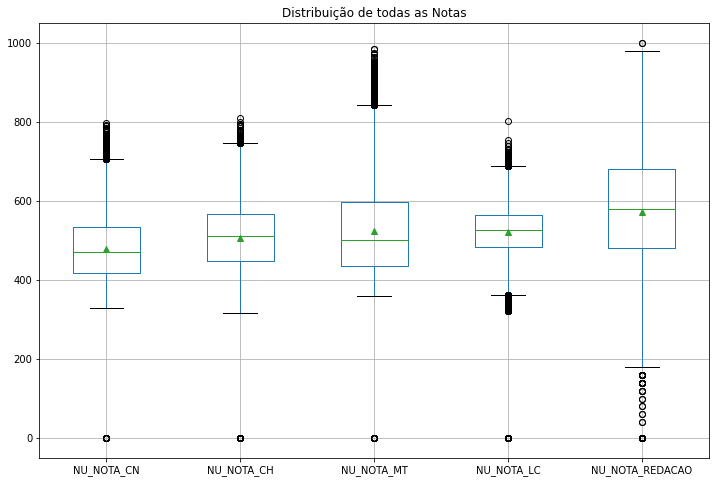

In [28]:
# gera um gráfico boxplot de todas notas, exibe triangulo verde com a média
grafico = dados[provas].plot.box(grid=True, figsize=(12,8), showmeans=True)
# define o título do gráfico
grafico.set_title("Distribuição de todas as Notas")
# exibe o gráfico
plt.show()

# Desafio 4
Histograma das idades dos treineiros e dos não treineiros

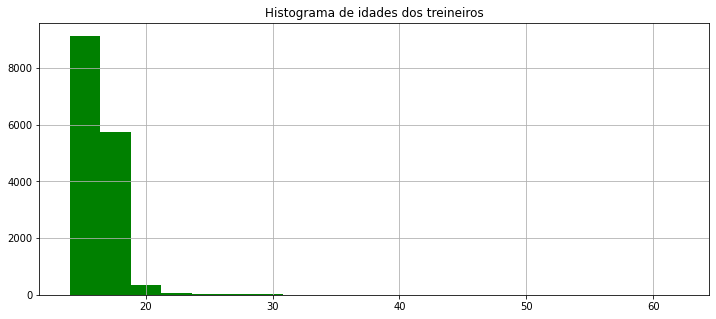

In [29]:
# gera um gráfico com o histograma referente as idades dos treineiros
grafico = dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=20, figsize=(12,5), color="green")
# define o título do gráfico
grafico.set_title("Histograma de idades dos treineiros")
# exibe o gráfico
plt.show()

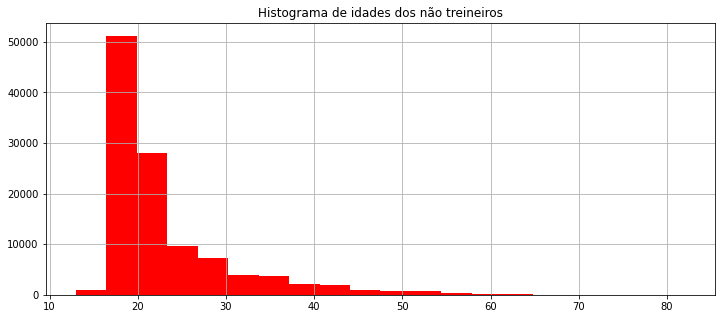

In [30]:
# gera um gráfico com o histograma referente as idades dos não treineiros
grafico = dados.query("IN_TREINEIRO != 1")["NU_IDADE"].hist(bins=20, figsize=(12,5), color="red")
# define o título do gráfico
grafico.set_title("Histograma de idades dos não treineiros")
# exibe o gráfico
plt.show()

# Desafio 5
Comparar as distribuições das provas em inglês e espanhol

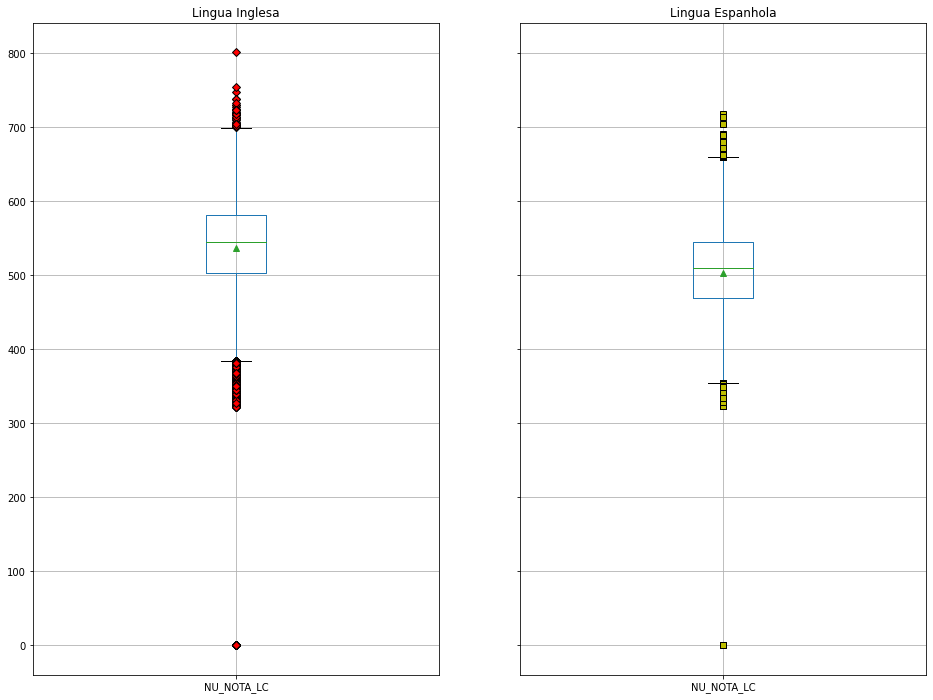

In [31]:
# configura exibição de mais de um gráfico. Os parâmetros indicam que os gráficos
# serão distribuídos em 1 linha, 2 colunas e compartilharão o mesmo Y, mais
# informações em:
# https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,12))

# define uma marcação que será utilizada na exibição dos outliers em inglês
marca_diamante_vermelho = dict(markerfacecolor='r', marker='D')
# define uma marcação que será utilizada na exibição dos outliers em espanhol
marca_quadrado_amarelo = dict(markerfacecolor='y', marker='s')

# define o título
ax1.set_title("Lingua Inglesa")
# realiza a consulta pela lingua inglesa e exibe o bloxplot
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].plot.box(ax=ax1, 
                                                     grid=True, 
                                                     showmeans=True,
                                                     flierprops=marca_diamante_vermelho)
# define o título
ax2.set_title("Lingua Espanhola")
# realiza a consulta pela lingua espanhola e exibe o bloxplot
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].plot.box(ax=ax2, 
                                                     grid=True, 
                                                     showmeans=True,
                                                     flierprops=marca_quadrado_amarelo)
# exibe o gráfico
plt.show()

# Desafio 6
Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [32]:
# explorado nos desafios anteriores